<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/mnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


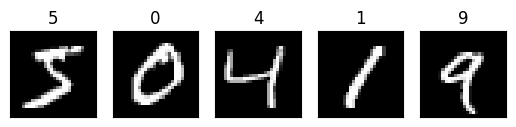

In [ ]:
def plot_example(x, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(x[:5], y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

plot_example(x_train, y_train)

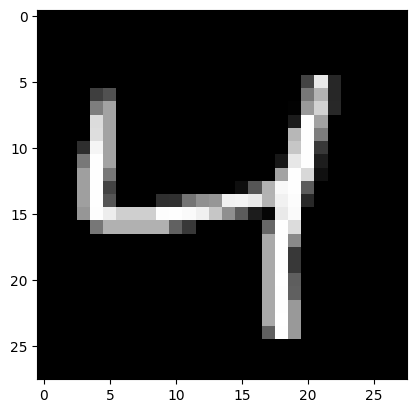

In [ ]:
plt.imshow(x_train[2], cmap='gray')

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7529 - loss: 0.7857 - val_accuracy: 0.9728 - val_loss: 0.0933
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9606 - loss: 0.1289 - val_accuracy: 0.9832 - val_loss: 0.0601
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9719 - loss: 0.0905 - val_accuracy: 0.9868 - val_loss: 0.0498
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9774 - loss: 0.0757 - val_accuracy: 0.9893 - val_loss: 0.0413
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9798 - loss: 0.0650 - val_accuracy: 0.9893 - val_loss: 0.0431
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9815 - loss: 0.0578 - val_accuracy: 0.9897 - val_loss: 0.0356
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9838 - loss: 0.0524 - val_accuracy: 0.9903 - val_loss: 0.0336
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9855 - loss: 0.0486 - val_accuracy: 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026468927040696144
Test accuracy: 0.9919000267982483


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


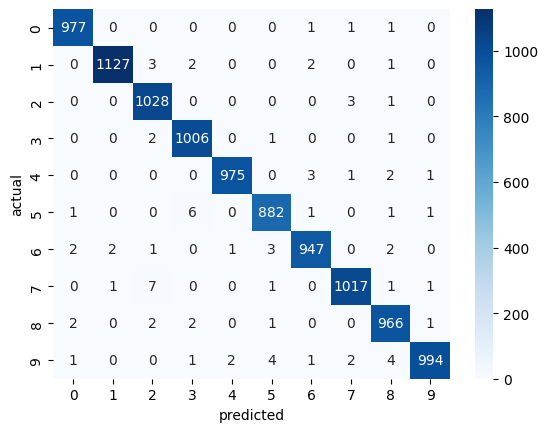

In [ ]:
from sklearn import metrics
import seaborn as sns

y_pred = model.predict(x_test)

def cf_matrix_plot(cf_matrix):
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    labels = np.asarray(group_counts).reshape(10, 10)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set(xlabel='predicted', ylabel='actual')

cf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

cf_matrix_plot(cf_matrix)

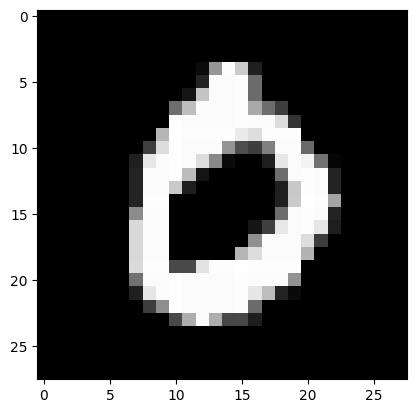

In [ ]:
plt.imshow(x_test[3], cmap='gray')

In [ ]:
y_pred0 = model.predict(x_test)[3]

np.argmax(y_pred0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(0)

In [ ]:
y_pred0

array([9.99848366e-01, 8.57605057e-13, 9.65368417e-06, 1.12665006e-07,
       1.31437332e-08, 6.08786834e-08, 1.31569410e-04, 3.75498601e-08,
       9.06624518e-06, 1.10987355e-06], dtype=float32)